In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"
df = pd.read_csv(URL)
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [3]:
#Column names
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [4]:
#data type
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

Notice the type of 'Date' is object, let's convert it to 'datatime' type and also let's extract 'Year' and 'Month' from date and include in the dataframe as separate columns

In [5]:
import datetime as dt

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month


In [6]:
df.dtypes


Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
Year                                     int64
Month                                    int64
dtype: object

## TASK 1.1: 
Let's try to understand the change in average estimated fire area over time
(use pandas to plot)

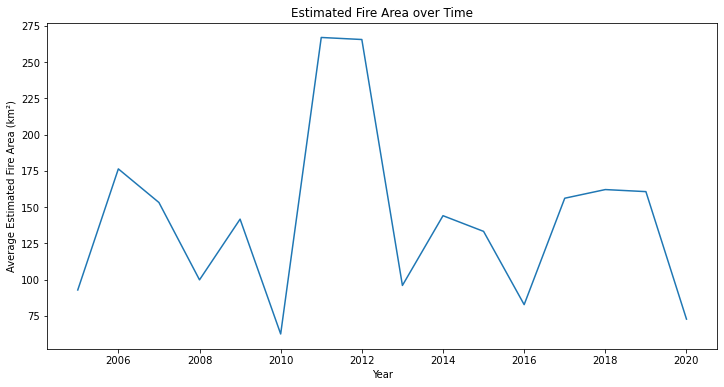

In [7]:
plt.figure(figsize=(12, 6))
    # Grouping the data by 'Year' and calculating the mean of 'Estimated_fire_area'
df_new = df.groupby('Year')['Estimated_fire_area'].mean()
    # Plotting the data
df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel('Year')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

## TASK 1.2: 
You can notice the peak in the plot between 2010 to 2013. Let's narrow down our finding, by plotting the estimated fire area for year grouped together with month.

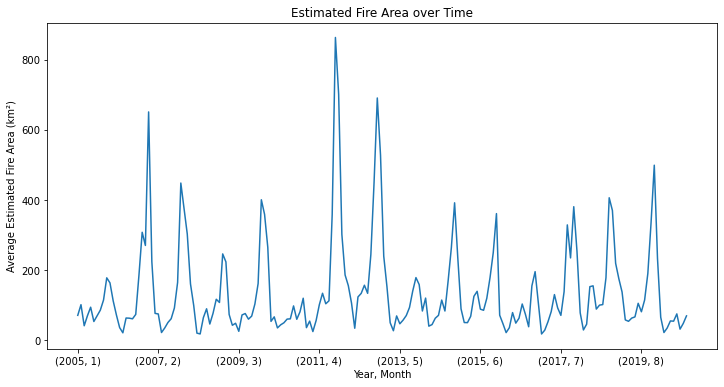

In [8]:
plt.figure(figsize=(12, 6))
# Grouping the data by both 'Year' and 'Month', and calculating the mean of 'Estimated_fire_area'
df_new1 = df.groupby(['Year','Month'])['Estimated_fire_area'].mean()
    # Plotting the data
df_new1.plot(x=df_new.index, y=df_new.values)
plt.xlabel('Year, Month')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

This plot represents that the estimated fire area was on its peak after 2011, April and before 2012. You can verify on google/news, this was the time of maximum wildfire hit in Australia

In [9]:
df['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

## TASK 1.3:
Let's have an insight on the distribution of mean estimated fire brightness across the regions
use the functionality of seaborn to develop a barplot

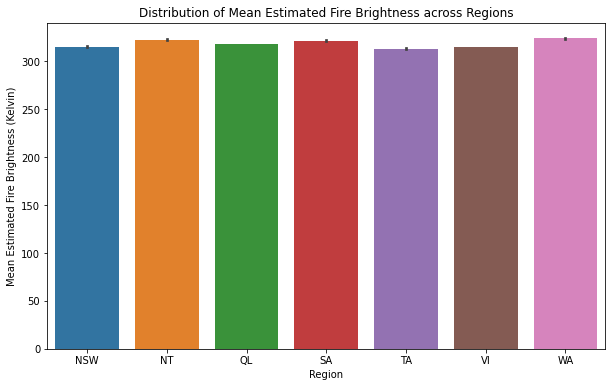

In [10]:
# Creating a bar plot using seaborn to visualize the distribution of mean estimated fire brightness across regions
plt.figure(figsize=(10, 6))
# Using seaborn's barplot function to create the plot
sns.barplot(data=df, x='Region', y='Mean_estimated_fire_brightness')
plt.xlabel('Region')
plt.ylabel('Mean Estimated Fire Brightness (Kelvin)')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')
plt.show()


## TASK 1.4: 
Let's find the portion of count of pixels for presumed vegetation fires vary across regions
we will develop a pie chart for this

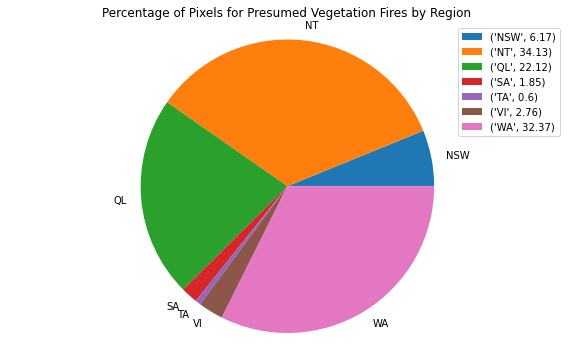

In [11]:
# Creating a pie chart to visualize the portion of count of pixels for presumed vegetation fires across regions
plt.figure(figsize=(10, 6))
# Grouping the data by region and summing the counts
region_counts = df.groupby('Region')['Count'].sum()
# Creating the pie chart using plt.pie function
# Labels are set to the region names, and autopct is used to display percentage
plt.pie(region_counts, labels=region_counts.index)
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.legend([(i,round(k/region_counts.sum()*100,2)) for i,k in zip(region_counts.index, region_counts)])
plt.axis('equal')
plt.show()


## TASK 1.6: 
Let's try to develop a histogram of the mean estimated fire brightness
Using Matplotlib to create the histogram

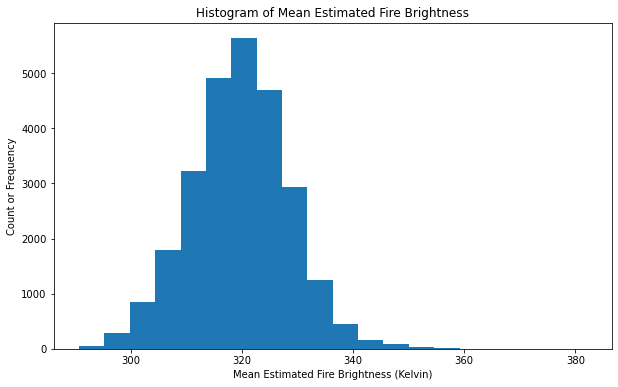

In [12]:
# Creating a histogram to visualize the distribution of mean estimated fire brightness
plt.figure(figsize=(10, 6))
# Using plt.hist to create the histogram
# Setting the number of bins to 20 for better visualization
plt.hist(x=df['Mean_estimated_fire_brightness'], bins=20)
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count or Frequency')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.show()

## TASK 1.7: 
What if we need to understand the distribution of estimated fire brightness across regions? Let's use the functionality of seaborn and pass region as hue

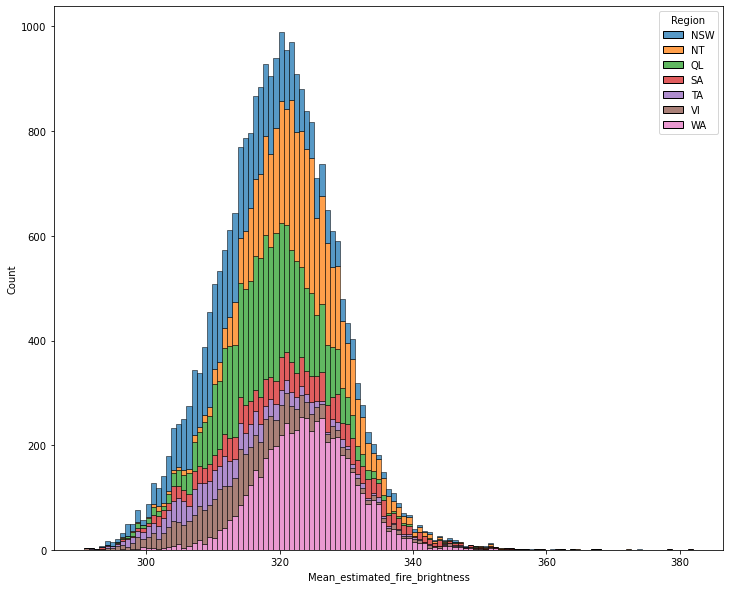

In [18]:
# Creating a histogram to visualize the distribution of mean estimated fire brightness across regions using Seaborn
# Using sns.histplot to create the histogram
# Specifying the DataFrame (data=df) and the column for the x-axis (x='Mean_estimated_fire_brightness')
# Adding hue='Region' to differentiate the distribution across regions
plt.figure(figsize=(12, 10))
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region',multiple='stack')
plt.show()

## TASK 1.8: 
Let's try to find if there is any correlation between mean estimated fire radiative power and mean confidence level

In [20]:
df[['Mean_estimated_fire_radiative_power','Mean_confidence']].corr()

,Mean_estimated_fire_radiative_power,Mean_confidence
Mean_estimated_fire_radiative_power,1.000000,0.452322
Mean_confidence,0.452322,1.000000


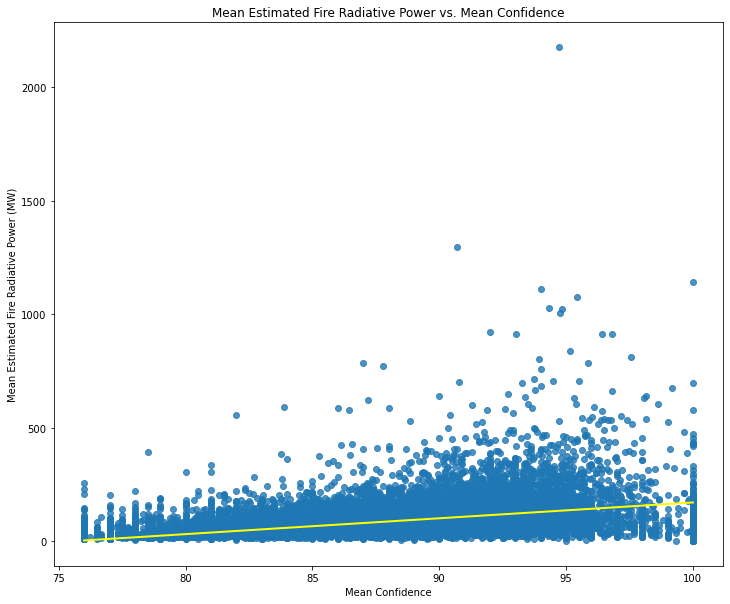

In [27]:
# Creating a scatter plot to visualize the relationship between mean estimated fire radiative power and mean confidence using Seaborn
plt.figure(figsize=(12,10))
# Using sns.scatterplot to create the scatter plot
# Specifying the DataFrame (data=df) and the columns for the x-axis (x='Mean_confidence') and y-axis(y='Mean_estimated_fire_radiative_power')
sns.regplot(data=df, x='Mean_confidence', y='Mean_estimated_fire_radiative_power',line_kws={"color": "yellow", "linewidth": 2})
plt.xlabel('Mean Confidence')
plt.ylabel('Mean Estimated Fire Radiative Power (MW)')
plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')
plt.show()

## TASK 1.9: 
Let's mark these seven regions on the Map of Australia using Folium
We have created a dataframe for you containing the regions, their latitudes and longitudes.
For australia use [-25, 135] as location to create the map

In [29]:
#First let's create a dataframe
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [33]:
# instantiate a feature group 
aus_reg = folium.map.FeatureGroup()

# Create a Folium map centered on Australia
Aus_map = folium.Map(location=[-25, 135], zoom_start=4)

# loop through the region and add to feature group
for lat, lng, lab in zip(reg.Lat, reg.Lon, reg.region):
    aus_reg.add_child(
        folium.CircleMarker(
            [lat, lng],
            popup=lab,
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
Aus_map.add_child(aus_reg)